Implementing the **Poisson Model of Spike Generation** according to David Heeger's paper of the same name from 2000

In [70]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy as sp
from scipy import signal


In [71]:
dt = 0.001          # in s
n_steps = 500       # number of time steps
firing_rate = 300.  # number of spikes per second


In [72]:
def poisson_spiketrain(n_steps, dt, firing_rate):
    spike_train = np.zeros(n_steps)
    spike_train_rand = np.random.rand(n_steps)
    for i in np.arange(n_steps):
        if spike_train_rand[i] < firing_rate*dt:
            spike_train[i]=1
    return spike_train    

In [73]:
spikes = poisson_spiketrain(n_steps, dt, firing_rate)
print(spikes[1:20])

[ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.]


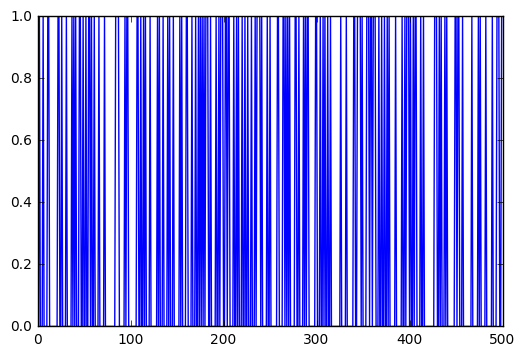

In [74]:
plt.plot(spikes)

Fano factor: F = sigma_n²/E[n]; should be F=1 for a Poisson process

In [75]:
def compute_intervalls(spikes):
    return

# Filtering for computing the spike rate

## Filtering by convoluting the spike train signal with a rectangular kernel

In [103]:
def rect_convolution(spikes):
    rect_kernel = np.array([0,0,0,1,1,1,1,0,0,0])
    plt.plot(rect_kernel)
    rect_rate = np.convolve(spikes,rect_kernel,mode='same')*250
    return rect_rate

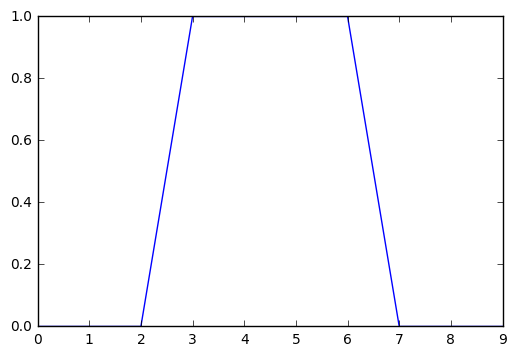

In [106]:
rect_rate = rect_convolution(spikes)

[ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.]
[ 500.  500.  250.  250.  250.  250.  250.  250.    0.  250.  500.  500.
  500.  250.]
('the mean fire rate is', 308.5)


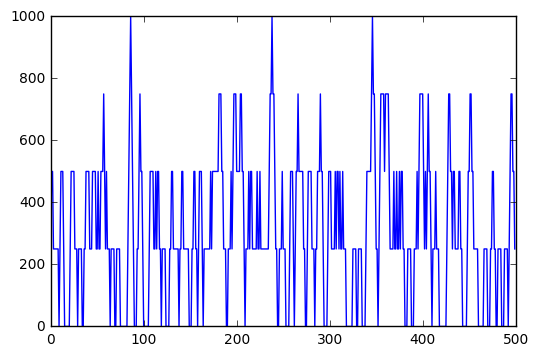

In [107]:
plt.plot(rect_rate)
print(spikes[1:15])
print(rect_rate[1:15])
mean_fire_rate = np.mean(rect_rate)
print('the mean fire rate is',mean_fire_rate)

The mean firing rate after the filtering is very close to the firing rate which we have set to 300 Hz in the beginning

## Filtering by convoluting the spike train signal with a gaussian kernel

[ 0.07955951  0.21626517  0.45783336  0.7548396   0.96923323  0.96923323
  0.7548396   0.45783336  0.21626517  0.07955951]
('scaling factor: ', 201.79754197282131)


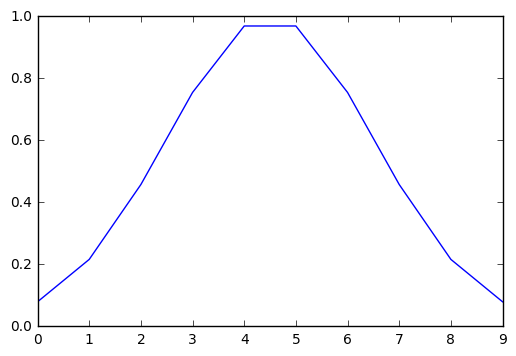

In [95]:
kernel_size = 10 
# the kernel size of the gaussian window depends on the time resolution in which 
# we want to investigate the spike train signal
gaussian_kernel = signal.gaussian(kernel_size, std=2)
print(gaussian_kernel)
plt.plot(gaussian_kernel)
scaling_factor = 1/np.sum(gaussian_kernel)*1/dt
print('scaling factor: ',scaling_factor)

In [96]:
def gaussian_convolution(spikes,dt,gaussian_kernel,scaling_factor):
    gauss_rate = np.convolve(spikes,gaussian_kernel,mode='same')*scaling_factor
    return gauss_rate

('the mean fire rate is', 308.12028117250958)


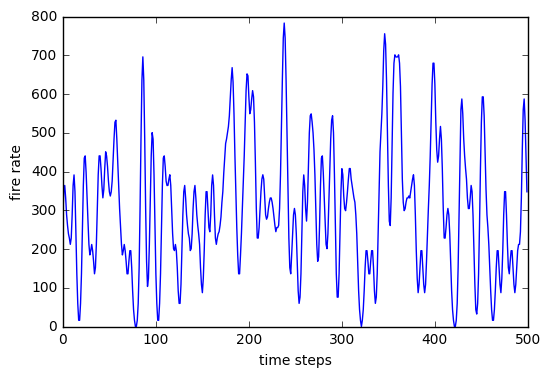

In [100]:
gauss_rate = gaussian_convolution(spikes,dt,gaussian_kernel,scaling_factor)
plt.plot(gauss_rate)
plt.xlabel('time steps')
plt.ylabel('fire rate')
mean_fire_rate_2 = np.mean(gauss_rate)
print('the mean fire rate is',mean_fire_rate_2)

## Filtering by convoluting the spike train signal with an alpha kernel